# WORLD'S BEST EMPLOYERS

Import Library and Dataset

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("Downloads/Worlds Best Employers.csv")

Exploratory Data Analysis

In [3]:
df.head(10)

,RANK,NAME,INDUSTRIES,COUNTRY/TERRITORY,EMPLOYEES
0,1.0,Samsung Electronics,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673"
1,2.0,Microsoft,"IT, Internet, Software & Services",United States,"221,000"
2,3.0,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000"
3,4.0,Alphabet,"IT, Internet, Software & Services",United States,"156,500"
4,5.0,Apple,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000"
5,6.0,Delta Air Lines,Transportation and Logistics,United States,"80,000"
6,7.0,Costco Wholesale,Retail and Wholesale,United States,"288,000"
7,8.0,Adobe,"IT, Internet, Software & Services",United States,"25,988"
8,9.0,Southwest Airlines,Transportation and Logistics,United States,"55,093"
9,10.0,Dell Technologies,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000"


In [4]:
df.sample(10)

,RANK,NAME,INDUSTRIES,COUNTRY/TERRITORY,EMPLOYEES
83,84.0,Naval Group,Aerospace & Defense,France,"17,373"
56,57.0,Colgate-Palmolive,Packaged Goods,United States,"33,800"
43,44.0,Volkswagen Group,Automotive (Automotive and Suppliers),Germany,"668,000"
28,29.0,Pfizer,Drugs & Biotechnology,United States,"79,000"
34,35.0,3M,Conglomerate,United States,"95,000"
91,92.0,The Hartford,Banking and Financial Services,United States,"18,100"
82,83.0,Kempinski Hotels,Travel & Leisure,Switzerland,"22,500"
62,63.0,L'Oréal,Packaged Goods,France,"85,252"
9,10.0,Dell Technologies,"Semiconductors, Electronics, Electrical Engine...",United States,"133,000"
30,31.0,IKEA,Retail and Wholesale,Netherlands,"208,000"


In [5]:
# check null
df.isnull().sum()

RANK                 0
NAME                 0
INDUSTRIES           0
COUNTRY/TERRITORY    0
EMPLOYEES            0
dtype: int64

In [6]:
# check duplicated
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RANK               100 non-null    float64
 1   NAME               100 non-null    object 
 2   INDUSTRIES         100 non-null    object 
 3   COUNTRY/TERRITORY  100 non-null    object 
 4   EMPLOYEES          100 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.0+ KB


In [8]:
df['EMPLOYEES']= df['EMPLOYEES'].str.replace(',','').astype(int)

### SUMMARY

In [55]:
print("TOP 10 World's Best Employers")
df['NAME'].head(10)

TOP 10 World's Best Employers


0    Samsung Electronics
1              Microsoft
2                    IBM
3               Alphabet
4                  Apple
5        Delta Air Lines
6       Costco Wholesale
7                  Adobe
8     Southwest Airlines
9      Dell Technologies
Name: NAME, dtype: object

In [18]:
print("Which country has highest number of companies")
df['COUNTRY/TERRITORY'].value_counts()

Which country has highest number of companies


United States           40
Germany                 17
France                   8
Italy                    6
Japan                    5
China                    4
South Korea              3
Netherlands              3
Switzerland              3
United Kingdom           2
Canada                   2
Austria                  1
Singapore                1
South Kore               1
Sweden                   1
Saudi Arabia             1
India                    1
United Arab Emirates     1
Name: COUNTRY/TERRITORY, dtype: int64

Text(0.5, 1.0, 'Total Employees in Eacy Country')

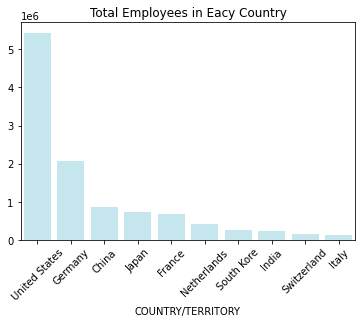

In [51]:
totalEmployees = df.groupby(['COUNTRY/TERRITORY'])['EMPLOYEES'].sum().nlargest(10)
sns.barplot(x=totalEmployees.index, y=totalEmployees.values, color='#BFEAF5')
plt.xticks(rotation=45)
plt.title('Total Employees in Eacy Country')

In [49]:
industry1=df.groupby(['INDUSTRIES'])['COUNTRY/TERRITORY'].count().nlargest(10)
fig = px.scatter(industry1, y=industry1.values, x=industry1.index, title='Industry with the largest number of countries', color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_traces(marker_size=20)
fig.show()

In [48]:
industry2=df.groupby(['INDUSTRIES'])['EMPLOYEES'].sum().nlargest(5)
fig = px.scatter(industry2, y=industry2.values, x=industry2.index, title='Industry with the largest number of employees', color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_traces(marker_size=20)
fig.show()